In [1]:
data_read <- read.csv("data_latih_opsi_1.csv")
head(data_read)

Suhu,Waktu,Langit,Kelembapan,Oke
2,2,2,2,0
2,2,1,2,0
2,1,4,2,0
2,3,3,1,1
2,4,2,3,0
2,4,1,2,1


,Suhu,Waktu,Langit,Kelembapan,Oke
49,1,1,1,3,1
4,2,3,3,1,1
28,1,1,3,2,1
41,1,1,4,2,1
15,2,1,1,2,0
29,1,4,4,3,0


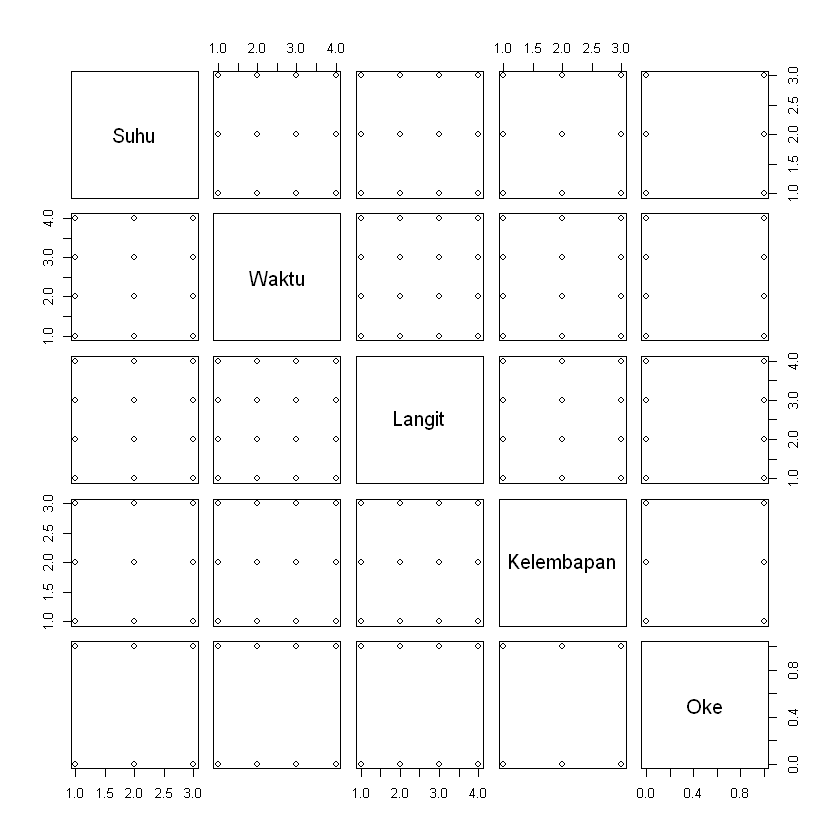

In [2]:
plot(data_read)
shuffle_index <- sample(1:nrow(data_read))
data_read <- data_read[shuffle_index, ]
head(data_read)

In [3]:
library(rpart)

In [14]:
create_train_test <- function(data, size, train = TRUE) {
    n_row = nrow(data)
    total_row = size * n_row
    train_sample <- 1: total_row
    if (train == TRUE) {
        return (data[train_sample, ])
    } else {
        return (data[-train_sample, ])
    }
}

data_train <- create_train_test(data_read, 0.75, train = TRUE)
data_test <- create_train_test(data_read, 0.75, train = FALSE)
dim(data_test)

[1] 20  5


Classification tree:
rpart(formula = Oke ~ ., data = data_train, method = "class")

Variables actually used in tree construction:
[1] Suhu  Waktu

Root node error: 29/60 = 0.48333

n= 60 

       CP nsplit rel error  xerror    xstd
1 0.34483      0   1.00000 1.41379 0.12425
2 0.10345      1   0.65517 0.89655 0.13236
3 0.01000      2   0.55172 0.79310 0.12986
Call:
rpart(formula = Oke ~ ., data = data_train, method = "class")
  n= 60 

         CP nsplit rel error    xerror      xstd
1 0.3448276      0 1.0000000 1.4137931 0.1242496
2 0.1034483      1 0.6551724 0.8965517 0.1323587
3 0.0100000      2 0.5517241 0.7931034 0.1298647

Variable importance
 Suhu Waktu 
   52    48 

Node number 1: 60 observations,    complexity param=0.3448276
  predicted class=0  expected loss=0.4833333  P(node) =1
    class counts:    31    29
   probabilities: 0.517 0.483 
  left son=2 (26 obs) right son=3 (34 obs)
  Primary splits:
      Waktu      < 2.5 to the right, improve=4.2064860, (0 missing)
      S

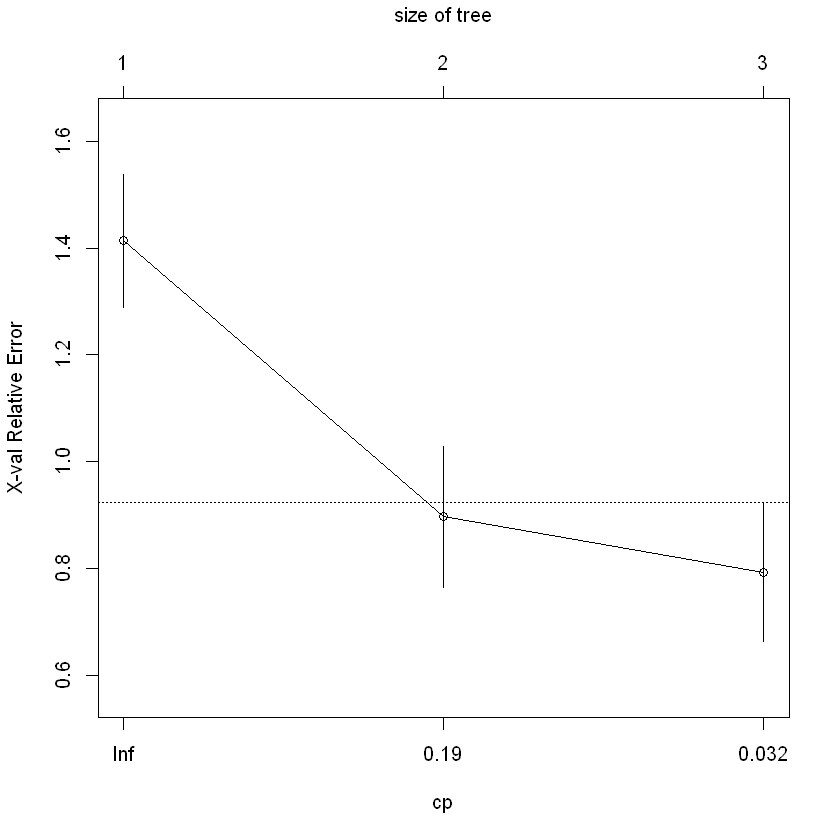

In [15]:
fit <- rpart(Oke~. ,data = data_train, method = 'class')

printcp(fit) # display the results
plotcp(fit) # visualize cross-validation results
summary(fit) # detailed summary of splits

In [16]:
predict_unseen <-predict(fit, data_test, type = 'class')
table_mat <- table(data_test$Oke, predict_unseen)
table_mat

   predict_unseen
    0 1
  0 9 0
  1 8 3

In [17]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test', accuracy_Test))


[1] "Accuracy for test 0.6"


In [18]:
data_search <- read.csv("data_uji_opsi_1.csv")
predict_data <- predict(fit, data_search, type = 'class')
print(predict_data)

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 0  1  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0 
Levels: 0 1
